# Getting to know Phyloseq
An interactive Jupyter-based tutorial prepared by __[Joseph E. Weaver](jeweave4@ncsu.edu)__ for Fall 2017 __[BIT 477/577 Metagenomics](http://biotech.ncsu.edu/system/courses/pdfs/000/000/037/original/BIT477_F17_Metagenomics_slide.pdf)__ at North Carolina State University.

**Note: This is the filled in version. You may want to try the blanked out version first.**

## Loading packages
`R` scripts usually call upon multiple packages which you have already installed through `CRAN` or with `bioconductor`.  This is how we tell the script what packages we'll be using.

In [2]:
library('phyloseq')
library('ggplot2')    #make good figures
library('assertthat') #used to test code in this interactive demo

## Built-in Datasets
We need some example data to play with. Phyloseq comes with a few datasets:
* GlobalPatterns
* esophagus
* enterotype
* soilrep

If you're curious, you can use ```?``` to get more info about each dataset. For example, `?GlobalPatterns`. We can load any of them with `data(*data_name*)`, like below. 

In [3]:
data("GlobalPatterns")

## Reading your own data
With phyloseq, if you can read the file, [you can import it](https://joey711.github.io/phyloseq/import-data.html). But, generally the path of least resistance is to have a <font color=green>biom file, metadata mapping file, and (ideally) a tree file</font>.  A commented example is below.  Here, we'll be using the built-in data to keep the example portable.

In [4]:
#biom_file <- "otu_table_mc2_w_tax.biom"
#map_file <- "mapping_w_metadata.txt"
#tree_file <- "rep_set.tre"

##BIOM files used to be text based but have moved on to a binary format
##Older phyloseq versions only understand the text based format
##If you can't upgrad phloseq, search for 'read_hdf5_biom'

##actually import the biom, metadata, and tree file

##parseFunction changes Rank names by getting rid of greengenes prefixes
##e.g. from "g_Vibrio" to "vibrio"

#fullscale<-import_biom2b,parseFunction = parse_taxonomy_greengenes)
#map <-import_qiime_sample_data(map_file)
#treefile <- read_tree(tree_file)

##merge all the data into a phyloseq object, creatively named 'run1'
#run1 <-merge_phyloseq(fullscale,map,treefile)


## Getting to know your data
In many cases, you'll want to *get to know your data and then transform it to get the most illustrative graphs*. `Phyloseq` objects have a lot of *accessors* and *processors* for just these situations.  As a matter of fact, most of your time creating a data visualizing will usually be spent arranging data. The final graphics are pretty simple to generate, apart from aesthetic tweaking. Typing the name of the dataset (once loaded) will give you a high level summary.

In [5]:
GlobalPatterns

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 19216 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 19216 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 19216 tips and 19215 internal nodes ]

### Accesors

An *accessor* lets you <font color=green>find out basic things about your data set</font>.

For example, ```ntaxa``` will return the number of taxa in the taxonomy table.  Edit the code below with your guess for what   what you think ```ntaxa(GlobalPatterns)``` would return, based on the summary above.

In [6]:
#In R, you can assign values to a variable using the '<-' operator
# For example, to assign the value of '2' to the variable 'myVar':
# myVar <- 2

my_guess <- 19216 #<- Change 0 to your guess.  
real_value <- ntaxa(GlobalPatterns)
assert_that(my_guess==real_value)

[1] TRUE

Can you guess what accessor might list the number of samples?  It's listed in this image:

<img src="getters_setters.png"> 

Go ahead and alter the code below to use the correct accessor so  that ```number_of_samples``` is correct.

In [8]:
number_of_samples <- nsamples(GlobalPatterns) #YOUR CODE HERE. Yes, reading ahead and typing '26' is cheating.
assert_that(26==number_of_samples)

[1] TRUE

What if you wanted to know what those samples were named?

In [9]:
sample_names(GlobalPatterns)

[1] "CL3"      "CC1"      "SV1"      "M31Fcsw"  "M11Fcsw"  "M31Plmr" 
 [7] "M11Plmr"  "F21Plmr"  "M31Tong"  "M11Tong"  "LMEpi24M" "SLEpi20M"
[13] "AQC1cm"   "AQC4cm"   "AQC7cm"   "NP2"      "NP3"      "NP5"     
[19] "TRRsed1"  "TRRsed2"  "TRRsed3"  "TS28"     "TS29"     "Even1"   
[25] "Even2"    "Even3"

The names themselve are not immediately informative in this case, but each sample has a bunch of other variables associated with it. You can get a list of those variables like so:

In [10]:
sample_variables(GlobalPatterns)

[1] "X.SampleID"               "Primer"                  
[3] "Final_Barcode"            "Barcode_truncated_plus_T"
[5] "Barcode_full_length"      "SampleType"              
[7] "Description"

`'Description'` and `'SampleType'` Both look useful, we can get values store din those variables like so: 

In [11]:
get_variable(GlobalPatterns)$Description

[1] Calhoun South Carolina Pine soil, pH 4.9    
 [2] Cedar Creek Minnesota, grassland, pH 6.1    
 [3] Sevilleta new Mexico, desert scrub, pH 8.3  
 [4] M3, Day 1, fecal swab, whole body study     
 [5] M1, Day 1, fecal swab, whole body study     
 [6] M3, Day 1, right palm, whole body study     
 [7] M1, Day 1, right palm, whole body study     
 [8] F1, Day 1,  right palm, whole body study    
 [9] M3, Day 1, tongue, whole body study         
[10] M1, Day 1, tongue, whole body study         
[11] Lake Mendota Minnesota, 24 meter epilimnion 
[12] Sparkling Lake Wisconsin, 20 meter eplimnion
[13] Allequash Creek, 0-1cm depth                
[14] Allequash Creek, 3-4 cm depth               
[15] Allequash Creek, 6-7 cm depth               
[16] Newport Pier, CA surface water, Time 1      
[17] Newport Pier, CA surface water, Time 2      
[18] Newport Pier, CA surface water, Time 3      
[19] Tijuana River Reserve, depth 1              
[20] Tijuana River Reserve, depth 2              
[21] Tijuana River Reserve, depth 2              
[22] Twin #1                                     
[23] Twin #2                                     
[24] Even1                                       
[25] Even2                                       
[26] Even3                                       
25 Levels: Allequash Creek, 0-1cm depth ... Twin #2

`'Description'` gives you a lot more information, but what if you were interested in the type of sample (`SampleType`)?

In [12]:
sampleTypes <- get_variable(GlobalPatterns)$SampleType # insert your call to an accessor here

expected <- factor(c("Soil", "Soil", "Soil", "Feces",  "Feces", "Skin", "Skin", "Skin", "Tongue", "Tongue", "Freshwater", "Freshwater", "Freshwater (creek)", "Freshwater (creek)", "Freshwater (creek)", "Ocean", "Ocean", "Ocean", "Sediment (estuary)", "Sediment (estuary)", "Sediment (estuary)", "Feces", "Feces", "Mock", "Mock", "Mock"))

are_equal(expected,sampleTypes)

[1] TRUE

You may have noticed a few things in that test.  First, a lot of the samples have the same type, so there's a lot of repeated words. R is smart enough to understand that these are experimental factors and can interpret lists of *strings* (fancy word for text) as factors. Sometimes this gets in the way, but sometimes it is also useful.  For example, if you just wanted to see the levels for a factor:

In [13]:
levels(get_variable(GlobalPatterns)$SampleType)

[1] "Feces"              "Freshwater"         "Freshwater (creek)"
[4] "Mock"               "Ocean"              "Sediment (estuary)"
[7] "Skin"               "Soil"               "Tongue"

### Processors

A *processor* allows you to <font color=green>manipulate your data in many ways</font>, often slicing and dicing it or reducing in other ways, such as merging similar taxa together.

Imagine you were interested in only *Ocean* samples. You can use `subset_samples` to <font color=green>limit your dataset to only those samples which you want to analyze</font>. `subset_samples` and other similar functions can take a phyloseq dataset, apply a *logical expression* to it, and return a new, reduced data set.  For *Ocean* samples, the logical expression is straightforward: `SampleType =="Ocean"`

In [14]:
ocean_only<-subset_samples(GlobalPatterns, SampleType=="Ocean")

You can get pretty fancy with your logical expression, for example, if  you wanted to get either samples with Skin or Soil

In [15]:
skin_or_soil<-subset_samples(GlobalPatterns, SampleType %in% c("Skin","Soil"))

The `%in%` operator is pretty powerful. A loosely wordered interpretation is that it tells you if a thing matches any of the stuff listed in the ```c()``` portion. If you haven't seen it before `c("fro","baz","buz")` is the `R`-ish way of **c**ombining a bunch of things into a vector or list. So, `skin_or_soil` is based on checking if the contents of each `SampleType` entry match either `"Skin"` or `"Soil"`.   As with most of the `R` stuff, for more explanations of `c` or `%in%` you can always use the inline help:

In [16]:
?c

In [17]:
#being tricky here  %in% is weird, so we want
?match

In [18]:
#I happened to know match includes %in%, if we didn't know this, we'd get a nice hint with
#help.search(apropos="%in%")

You can also exclude stuff, for example, if you wanted to exclude any creeks:

In [19]:
no_creeks <-subset_samples(GlobalPatterns, !(SampleType %in% c("Freshwater (creek)")))

Going back to our "ocean samples only" subset, if you type just the name of the new object, you'll see some interesting things. 

In [20]:
ocean_only

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 19216 taxa and 3 samples ]
sample_data() Sample Data:       [ 3 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 19216 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 19216 tips and 19215 internal nodes ]

 You'll notice the number of samples has decreased to just 3, which is what you'd expect.  <font color=green>But things like the number of taxa and the size of the phylogenetic tree are unchanged.</font> This is because phyloseq is conversative and doesn't prune more than it has to. Among other things, this makes it really nice if you want to do a few subsets and then merge the results later. So, there's two things to handle here; first we'll do the simple part, verify that Ocean is the only level for your samples ocean_only.  

In [25]:
ooLevels <- levels(get_variable(ocean_only)$SampleType)#fill in the rest
are_equal('Ocean',ooLevels)

[1] TRUE

Ok great, now let's handle all those empty taxa. We're going to do this in two parts. First we'll write the bit that does the work, then realizing that we'll want to do this a lot, I'll show you how to wrap it up into a fucntion.

To remove empty taxa, we're going to use two built in phyloseq functions ```prune_taxa``` and ```taxa_sums```.

```taxa_sums``` is a really handy convenience method. It tells you the per-OTU total across all samples.  This is just a rowsum or colsum, but it takes advantage of knowing how your OTU table is laid out.  So, if you wanted to generate a list of all non-0 taxa in ```x```, you would do something like:

```taxa_sums(x) > 0``` 

```prune_taxa``` is a way of saying 'apart from my list of exceptions, remove all the taxa from this object. So, to keep only the taxa within x that are not empty, you could write:

```prune_taxa(taxa_sums(x) > 0, x)```

However, you're going to be doing something like this a lot, and one of the really good rules in writing code is Don't Repeat Yourself.  One way to avoid that is to wrap up code in reusable functions.  Below, were' going to wrap up our empty-taxa-removing code into a function called ```removeEmptyTaxa```.

In [26]:
removeEmptyTaxa <- function(x) {
   return(prune_taxa(taxa_sums(x) > 0, x))
}

You can see how it works by running the code below.

In [27]:
removeEmptyTaxa(ocean_only)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5669 taxa and 3 samples ]
sample_data() Sample Data:       [ 3 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 5669 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5669 tips and 5668 internal nodes ]

Now we still have only 3 samples, and it appears that only 5669 taxa were not empty.  One important point, look what happens if you get a summary of ```ocean_only```.

In [28]:
ocean_only

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 19216 taxa and 3 samples ]
sample_data() Sample Data:       [ 3 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 19216 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 19216 tips and 19215 internal nodes ]

We're back to 19216 taxa.  Actually, we're not back, this is the way ```ocean_only``` has always been.  This is because <font color=green>the way we wrote removeEmptyTaxa intentionally does not modify the data you pass to it as ```x```.</font>  Sometimes you may want a different behaviour, but this is a really good way to avoid shooting yourself in the foot.  <font color=green>To 'preserve' the value from `removeEmptyTaxa`, you can assign it to a variable.</font>

In [29]:
ocean_only.noEmpties <- removeEmptyTaxa(ocean_only)
#let's check
ocean_only.noEmpties

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5669 taxa and 3 samples ]
sample_data() Sample Data:       [ 3 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 5669 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5669 tips and 5668 internal nodes ]

Subsetting just doesn't have to be on metadata though, you can also use `subset_taxa` to llimit things to a particular taxon at any rank.  Why don't you go ahead and get a sample that's just the Firmicutes Phylum from Tongues and Feces and store it as 'GP.tf.firmOnly' after removing all empty taxa.  Hint, you can subset subsets.

In [46]:
GP.tf <- subset_samples(GlobalPatterns, SampleType %in% c("Tongue","Feces"))
GP.tf.firmOnly <- subset_taxa(GP.tf, Phylum="Firmicutes")
GP.tf.firmOnly <- removeEmptyTaxa(GP.tf.firmOnly)
GP.tf.firmOnly

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 6947 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 6947 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 6947 tips and 6946 internal nodes ]

In [47]:
are_equal(6,nsamples(GP.tf.firmOnly))
are_equal(6947,ntaxa(GP.tf.firmOnly))

[1] TRUE

[1] TRUE

Two final things.  Right now all of our counts in raw abundances.  We'd often like to work with relative abundance. Here's a quick and dirty way to do that.

In [48]:
GP.tf.firmOnly  = transform_sample_counts(GP.tf , function(x) 100 * x/sum(x))

Also, just to make things run quickly and not overload some graphs, we're going to restrict ourselves to OTUs with 25% or greater relative abdundance.  Note, this a horrible thing to do in a real analysis without a lot  justification.

In [49]:
GP.tf.firmOnly.top75<-prune_taxa(taxa_sums(GP.tf.firmOnly)>0.25,GP.tf.firmOnly)

# Graphing (non-ordination)
Finally, we've looked at our data and manipulated it in a bunch of different ways. Let's make some pretty pictures.
```plot_bar``` is a built-in method that we're using here to split things up by their class and color code by order.  We're going ahead and giving it a title and telling it to break apart the graph into multiple graphs sorted by Sample and SampleType. We're also suppressing the legend for the fill colors because it's not very useful in this case.

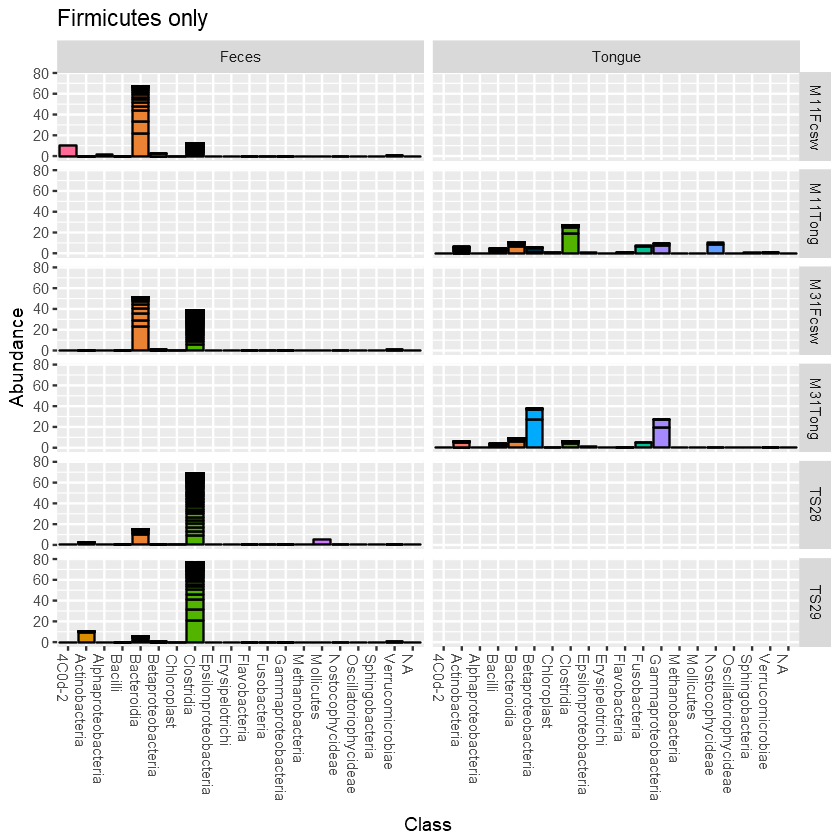

In [50]:
#ggplot lets you play with plots nicely
theme_update(legend.position = "none")
plot_bar(GP.tf.firmOnly.top75 ,  x="Class",  fill="Order"  ,    title="Firmicutes only", facet_grid="Sample~SampleType")

This is nice, but there's a lot you could do to make it more aesthetically pleasing. An example of this is remove the lines which split up OTUs within the class.  You can take advantage of ```tax_glom``` to do just this. The line below tells phyloseq to roll up anything which shares the same Order into one taxon.

In [51]:
glommedUp <- tax_glom(GP.tf.firmOnly.top75,taxrank = "Order")

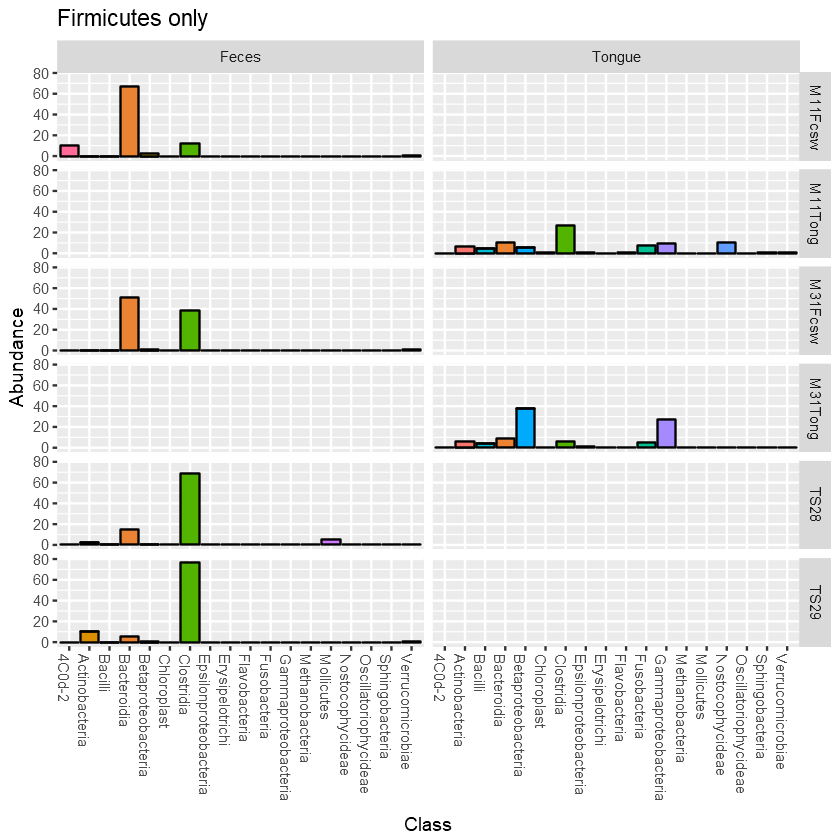

In [52]:
plot_bar(glommedUp ,  x="Class",  fill="Order"  ,    title="Firmicutes only", facet_grid="Sample~SampleType")

Let's say you wanted to dig deeper into just the Orders 'Clostridiales' and 'Bacteroidales'.  You could do this in two steps, first subset ```GP.tf.firmOnly.top75```, remove empty taxa, and save it as ```clostrid_bact```  Second, glom the taxa at the Family level, and plot the glommed data with by Order, with a fill color denoting Family.

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 133 taxa and 6 samples ]
sample_data() Sample Data:       [ 6 samples by 7 sample variables ]
tax_table()   Taxonomy Table:    [ 133 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 133 tips and 132 internal nodes ]

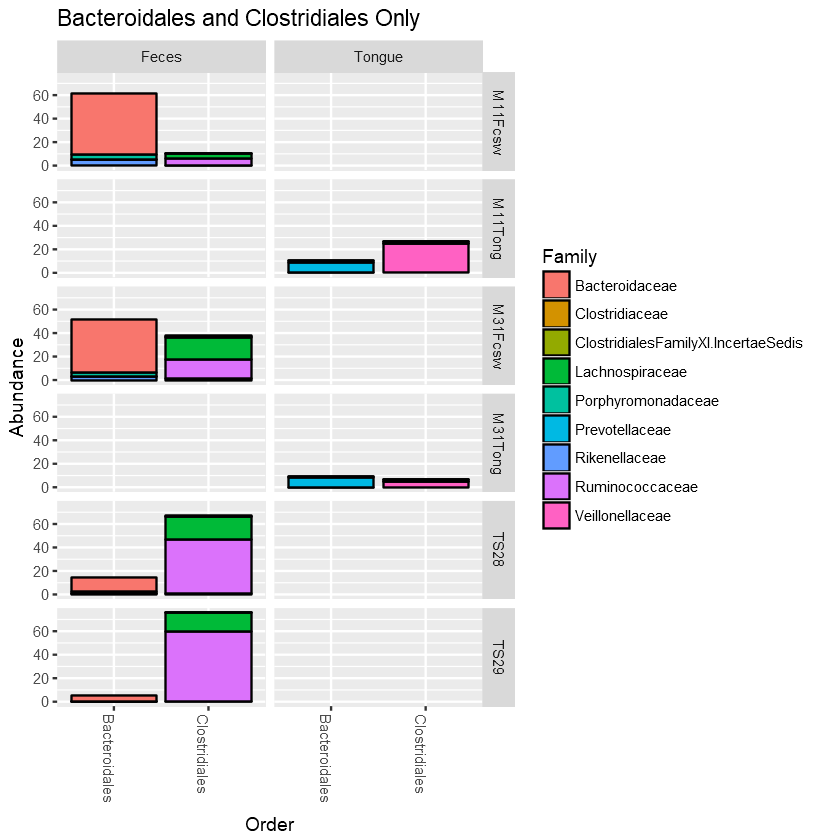

In [86]:
#in this case, we still want a legend
theme_update(legend.position = "right")

clostrid_bact <- subset_taxa(GP.tf.firmOnly.top75, Order %in% c("Clostridiales","Bacteroidales"))
clostrid_bact <- removeEmptyTaxa(clostrid)
clostrid_bact

clostrid_bact_glom <- tax_glom(clostrid_bact,taxrank = "Family")
plot_bar(clostrid_bact_glom,  x="Order",  fill="Family"  ,    title="Bacteroidales and Clostridiales Only", facet_grid="Sample~SampleType")

The graph you just generated above should look something like this:
<img src="clostrid_bact.png">

## Ordination

Finally, we can get to those ordination plots everyone loves.  For an ordination, you need a distance measure and an ordiantion method, phyloseq supports many with the ```ordinate``` function.  The choice of distance and ordination method is highly dependent on the goals of the analysis and, for better or worse, what people in your discipline are expecting.  My go-to references for choosing methods are the  __[excellent overview by Palmer](http://ordination.okstate.edu/overview.htm)__ and Legendre, P., and L. Legendre. 1998. Numerical Ecology, 2nd English Edition. Elsevier, Amsterdam.

If you wanted to make an NMDS plot of the entire GlobalPatterns dataset, using Bray-Curtis distances:

In [87]:
bray.pcoa <- ordinate(GlobalPatterns, distance = "bray", method = "NMDS")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.1612352 
Run 1 stress 0.1612349 
... New best solution
... Procrustes: rmse 0.0004601285  max resid 0.001694837 
... Similar to previous best
Run 2 stress 0.1614264 
... Procrustes: rmse 0.01471366  max resid 0.05901595 
Run 3 stress 0.1614663 
... Procrustes: rmse 0.0163276  max resid 0.05959625 
Run 4 stress 0.1612348 
... New best solution
... Procrustes: rmse 0.0001621614  max resid 0.0005862706 
... Similar to previous best
Run 5 stress 0.1614267 
... Procrustes: rmse 0.01469734  max resid 0.05891101 
Run 6 stress 0.1612349 
... Procrustes: rmse 0.0001103927  max resid 0.0004014224 
... Similar to previous best
Run 7 stress 0.1614264 
... Procrustes: rmse 0.01467362  max resid 0.05886534 
Run 8 stress 0.1612353 
... Procrustes: rmse 0.0002822585  max resid 0.001030589 
... Similar to previous best
Run 9 stress 0.1805754 
Run 10 stress 0.1613362 
... Procrustes: rmse 0.005929788  max resid 0.02183729 
Run 11

To actually get the plot, you need to send the results of your ordination *and* the dataset itself to ```plot_ordination```. Here, we're plotting the ordination we just did, split up by samples, and color-coded by SampleType.

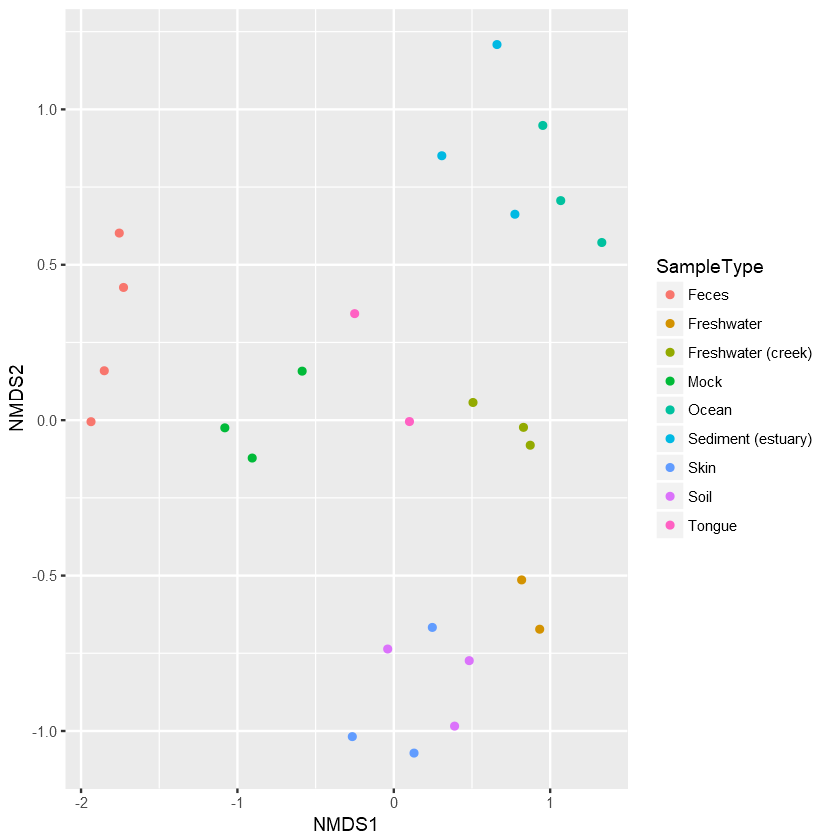

In [88]:
plot_ordination(GlobalPatterns,bray.pcoa,"samples",color="SampleType")

The great thing about these plots are that they can be tweaked after generation using standard methods the excellent ggplot2 package.

Let's increase the point sizes and make them a little transparent.

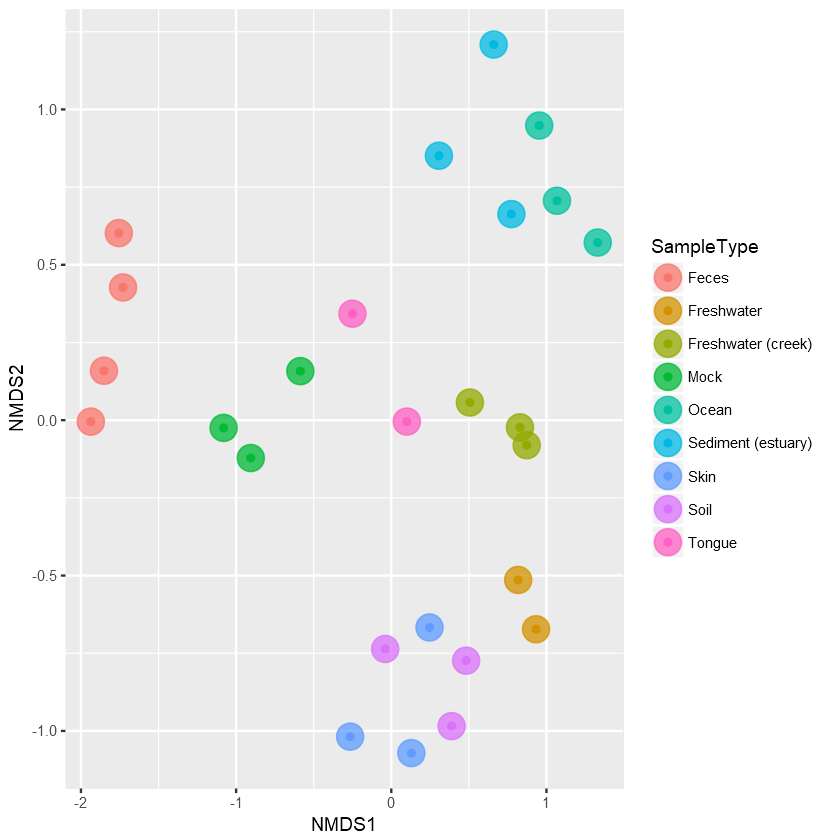

In [13]:
p<-plot_ordination(GlobalPatterns,bray.pcoa,"samples",color="SampleType")
p<-p+ geom_point(size=7, alpha=0.75)
p

Go ahead and plot a PCoA graph using the unifrac distance metric, color coded by SampleType, with no alpha/transparency.

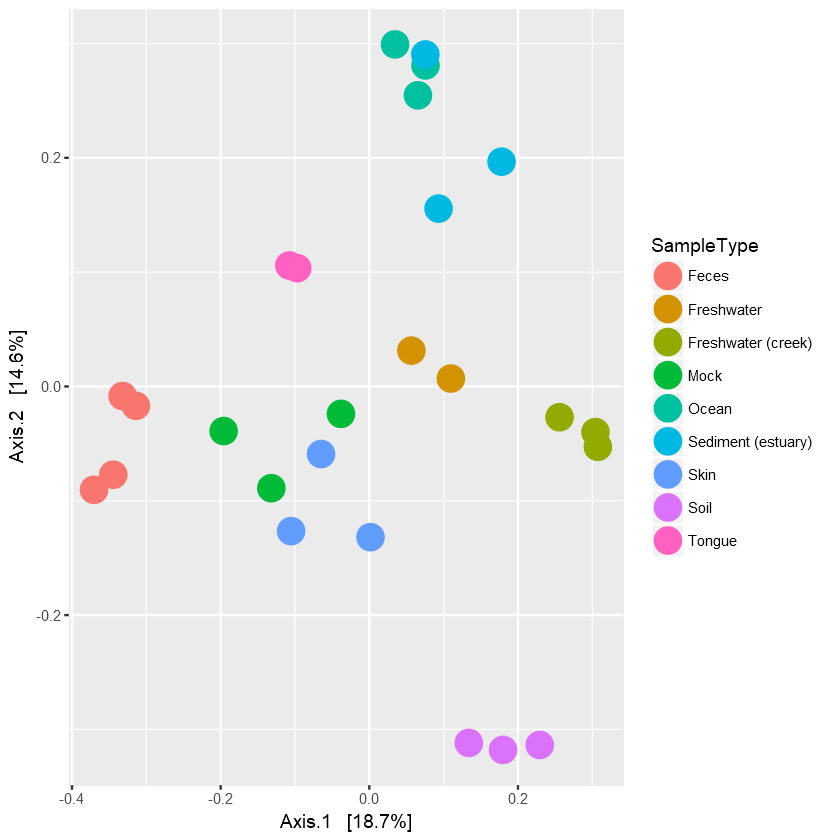

In [16]:
unifrac.pcoa <- ordinate(GlobalPatterns, distance = "unifrac", method = "PCoA")
p<-plot_ordination(GlobalPatterns,unifrac.pcoa ,"samples",color="SampleType")
p<-p+ geom_point(size=7)
p

You should've gotten something resembling this:
<img src="2ndord.png">

## Making new categories
One of the great things about having control of the data is that you can reorganize categories.  What if you were just intersted in differences between water and non-water samples.  You can do that by using ```get_variable``` to find all the SampleTypes which match your criteria.  Then you can set upa  new variable, here called water.  To make it show up in the graph, you can still color code by SampleType, but you can set the shape to show if it's water or not.  

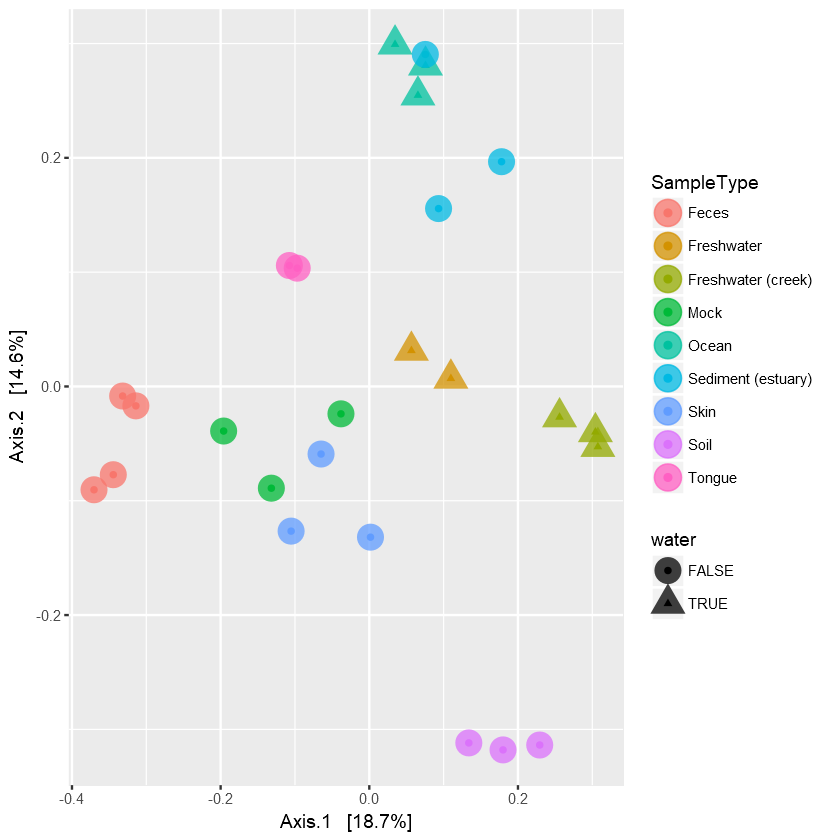

In [21]:
water = get_variable(GlobalPatterns, "SampleType") %in% c("Freshwater", "Freshwater (creek)", "Ocean")
sample_data(GlobalPatterns)$water <- factor(water)


p<-plot_ordination(GlobalPatterns,unifrac.pcoa ,"samples",color="SampleType",shape="water")
p<-p+ geom_point(size=7, alpha=0.75)
p

You could do the reverse (set the shape by SampleType and color by Water), but phyloseq will give you a hint why this is not a great idea with this particular data set. feel free to try that by modifing the above code if you're interested.

One final excercise.  Try making a new category called 'human', which is TRUE when the sample is human derived. Indicate 'human' by shape and SampleType by color.

In [89]:
human = get_variable(GlobalPatterns, "SampleType") %in% c("Feces", "Skin", "Tongue")
sample_data(GlobalPatterns)$human <- factor(human)


p<-plot_ordination(GlobalPatterns,unifrac.pcoa ,"samples",color="SampleType",shape="human")
p<-p+ geom_point(size=7, alpha=0.75)
p

Warning message in scores(ordination, choices = axes, display = "species", physeq = physeq):
"restarting interrupted promise evaluation"Warning message in plot_ordination(GlobalPatterns, unifrac.pcoa, "samples", color = "SampleType", :
"Could not obtain coordinates from the provided `ordination`. 
Please check your ordination method, and whether it is supported by `scores` or listed by phyloseq-package."

ERROR: Error in p + geom_point(size = 7, alpha = 0.75): non-numeric argument to binary operator


You should've gotten something like this:
<img src="hooman.png">

# Learning more.

This is barely scratching the surface, but hopefully you've become comfortable with importing your data into phyloseq, examining and modifying it, and seeing the basic workflow for generating figures.

To learn more about phyloseq and the figures it generates, a great starting off point is the tutorial section straight from __[the creator's website](https://joey711.github.io/phyloseq/index.html)__ .  If you want to continue for refine your figures, the best place to keep learning is at the __[companion website](http://www.cookbook-r.com/Graphs/)__ for the _R Graphics Cookbook_.

# Feedback
I would enjoy hearing that you liked this and would really love to hear about parts that need improvment.  Please don't hesistate to let me know at __[jeweave4@ncsu.edu](mailto:jeweave4@ncsu.edu?Subject=Phyloseq Jupyter Tutorial)__